In [68]:
1

1

In [ ]:
# import scvi


In [69]:
import scanpy as sc
#from scvi.external import MRVI
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
from matplotlib.colors import to_hex
# from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering
# from scipy.spatial.distance import squareform
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST

In [3]:
# adata2.write('adata_scrna_and_xenium.h5ad.forhvg.integrated2.clustered.addnewlabels.2000genes')
# adata2

8

In [ ]:
0

In [ ]:
0

In [ ]:
0

In [ ]:
8

# PREP

In [6]:
PATH='adata_scrna_freeze.h5ad'
adata=sc.read_h5ad(PATH)
#adata.obs.combined_anno.value_counts()

In [7]:
# adata.X[:8, :8].todense()

In [22]:
adata_5k = sc.read_h5ad('adata_xenium_freeze_plus3d.h5ad.september.plusnewdata.new.nononspecific')
#adata_5k.obs["lvl4_annotation"].value_counts()
adata_5k.obs["all_vs_core"].value_counts()

all_vs_core
paper               1775401
novel_timepoints     304506
Name: count, dtype: int64

In [ ]:
# adata_5k=adata_5k[adata_5k.obs["all_vs_core"]!="novel_timepoints"]

In [9]:
adata_5k[adata_5k.obs["lvl4_annotation"]=="beacon_ffpe"].obs.info_id6.value_counts()

info_id6
Healthy1    29834
Healthy2    29483
Name: count, dtype: int64

In [10]:
# RENAME={"beacon_ffpe": "New/unlabelled/excluded"
#     }
# adata_5k.obs["lvl4_annotation"]=adata_5k.obs["lvl4_annotation"].map(RENAME).fillna(adata_5k.obs["lvl4_annotation"])
# adata_5k.write('adata_xenium_freeze_plus3d.h5ad.september.plusnewdata')



In [11]:
adata_5k.obs["sample_id"]=adata_5k.obs["info_id6"]

In [12]:
# # adata.obs["lvl5_annotation2"] = adata.obs["combined_anno"]
# # adata_5k.obs["lvl5_annotation2"]  = "NEW/UNLABELLED/EXCLUDED"
# import numpy as np

# adata.obs["lvl5_annotation2"] = np.where(
#     adata.obs["tech"] != "xenium",
#     adata.obs["new_labels2"],  # keep old label if not xenium
#     "NEW/UNLABELLED/EXCLUDED"       # otherwise constant string
# )
# adata.obs["lvl5_annotation2"].value_counts()

In [13]:
# adata.obs["lvl5_annotation2"].isna().sum()

In [14]:
import pickle

# ---------- 1) Load the gene list you just pickled ----------
with open("xenium_genes.pkl", "rb") as f:
    xenium_genes = pickle.load(f)          # plain Python list (or pandas Index – works either way)


common_genes = [g for g in xenium_genes if g in adata.var_names]

# slice columns (AnnData is [obs, var])
adata = adata[:, common_genes].copy()      # .copy() avoids chained-slice headaches
adata_5k = adata_5k[:, common_genes].copy()      # .copy() avoids chained-slice headaches
adata_5k.shape

(2079907, 4993)

In [15]:
adata_5k.obs["scanvi_labels"]="New/unlabelled/excluded"
adata.obs["scanvi_labels"]=adata.obs["lvl4_annotation"]


In [16]:
import anndata as ad
adata_all=ad.concat([adata, adata_5k], label="tech", keys=["scrna", "xenium"], join="outer")

/opt/conda/envs/pytorch/lib/python3.10/site-packages/anndata/_core/merge.py:1349: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_annot = pd.concat(


In [17]:
del(adata)
del(adata_5k)
import gc
gc.collect()

9170

In [18]:
# adata_all=adata

In [19]:
adata_all.obs.sample_id.value_counts()

sample_id
3D_BK25_week12-D2    41328
BK39_Week 12         32059
BK30_Day 14          30439
Healthy1             29834
Healthy2             29483
                     ...  
GSM5277170            1027
GSM6111844            1014
GSM5652708            1012
GSM6165458            1012
GSM6111854             970
Name: count, Length: 482, dtype: int64

NameError: name 'adata_5k' is not defined

In [23]:
adata_all.write('adata_combined_new.h5ad')


In [ ]:
# counts = adata_all.obs['sample_id'].value_counts()
# small = counts[counts < 50].index.tolist()
# mask = ~adata_all.obs['sample_id'].isin(small)
# adata_all = adata_all[mask].copy()

In [ ]:
# adata_all.obs.sample_id.value_counts()
# adata_all.obs["sample_id"] = adata_all.obs["sample_id"].astype("category")
# adata_all.obs["sample_id"] = adata_all.obs["sample_id"].cat.remove_unused_categories()
# sc.pp.filter_genes(adata_all, min_cells=1)
# adata_all.shape
# #adata_all.write(PATH + '.forhvg')
# adata_all.obs.lvl4_annotation.value_counts()

In [ ]:
# adata_all.write('adata_combined_new.h5ad')


In [ ]:
# adata_all.obs.sample_id.value_counts()

In [ ]:
# adata = sc.read_h5ad('adata_scrna_and_xenium.h5ad.forhvg')


In [ ]:
# low_count_celltypes = adata.obs["lvl5_annotation2"].value_counts()
# low_count_celltypes[low_count_celltypes <= 10].index.tolist()

In [ ]:
# # Get value counts
# counts = adata.obs["lvl5_annotation2"].value_counts()

# # Filter to values with >=5 counts
# valid_values = counts[counts >= 10].index

# # Keep only rows with valid annotations
# adata = adata[adata.obs["lvl5_annotation2"].isin(valid_values)].copy()
# adata.obs["lvl5_annotation2"].value_counts()

In [ ]:
# END PREP

# LOAD

In [1]:
import scvi
import scanpy as sc
#from scvi.external import MRVI
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
from matplotlib.colors import to_hex
# from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering
# from scipy.spatial.distance import squareform
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [71]:
# 

In [2]:
#FOR_HVG_PATH = 'adata_scrna_and_xenium.h5ad.forhvg'
ADATA_PATH = 'adata_combined_new.h5ad.september.clustered.NEWNAMES'
#'adata_scrna_and_xenium.h5ad.forhvg.integrated2.clustered.addnewlabels' #         #"adata_scrna_and_xenium.h5ad"



In [3]:
adata=sc.read_h5ad(ADATA_PATH)
adata.shape

(3811042, 4993)

In [4]:
adata.obs["sample_id"].value_counts()

sample_id
3D_BK25_week12-D2    41328
BK39_Week 12         32059
BK30_Day 14          30439
Healthy1             29834
Healthy2             29483
                     ...  
GSM5277170            1027
GSM6111844            1014
GSM5652708            1012
GSM6165458            1012
GSM6111854             970
Name: count, Length: 482, dtype: int64

In [74]:
# adata = adata[adata.obs["combined_anno"]!="Nonspecific"]
# adata.shape

In [75]:
# [x for x in adata.obs.combined_anno.unique() if x.startswith("Non")]

In [76]:
# import pickle
# with open("xenium_genes.pkl", "rb") as f:
#     xenium_genes = pickle.load(f)          # plain Python list (or pandas Index – works either way)


# common_genes = [g for g in xenium_genes if g in adata.var_names]

# # slice columns (AnnData is [obs, var])
# adata = adata[:, common_genes].copy()      # .copy() avoids chained-slice headaches
# adata.shape

In [77]:
# import numpy as np

# adata.obs["lvl5_annotation2"] = np.where(
#     adata.obs["tech"] != "xenium",
#     adata.obs["lvl4_annotation"],     # if condition true
#     "NEW/UNLABELLED/EXCLUDED"         # else
# )
# adata.obs["lvl5_annotation2"].value_counts()


In [78]:
# adata.obs["sample_id"] = np.where(
#     adata.obs["tech"] != "xenium",
#     adata.obs["sample_id"],     # if condition true
#    adata.obs["info_id2"]      # else
# )
# adata.obs["sample_id"].value_counts()


In [79]:
# adata.obs["sample_id"].value_counts()

In [80]:
# adata.obs["sample_id"].isna().sum()


In [81]:
# adata.write(ADATA_PATH)

In [5]:
hvg_number_target=3000
hvg_number=hvg_number_target
HVG_BATCH_KEY="sample_id"
MAX_EPOCHS=10
run_scanvi=True
run_mrvi=False

BATCH_SIZE=512
N_LATENTS=10
N_LAYERS=1
neighbor=10
SCANVI_LABELS_KEY="final_labels3"  #"lvl5_annotation_new" #"lvl5_annotation2"
SCANVI_UNLABELLED= "New/unlabelled/unspecific" #"New/unlabelled/excluded"


In [6]:
counts = adata.obs['sample_id'].value_counts()
small = counts[counts < 500].index.tolist()
mask = ~adata.obs['sample_id'].isin(small)
adata = adata[mask].copy()
adata.obs.sample_id.value_counts()
adata.obs["sample_id"] = adata.obs["sample_id"].astype("category")
adata.obs["sample_id"] = adata.obs["sample_id"].cat.remove_unused_categories()
sc.pp.filter_genes(adata, min_cells=10)
adata.shape


(3811042, 4993)

In [7]:
adata.obs["sample_id"].value_counts()

sample_id
3D_BK25_week12-D2    41328
BK39_Week 12         32059
BK30_Day 14          30439
Healthy1             29834
Healthy2             29483
                     ...  
GSM5277170            1027
GSM6111844            1014
GSM5652708            1012
GSM6165458            1012
GSM6111854             970
Name: count, Length: 482, dtype: int64

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


In [9]:
# adata.obs["lvl5_annotation2"].value_counts()

In [10]:
def apply_qc_thresholds(adata, MIN_N_GENES, MAX_TOTAL_COUNT, MAX_PCT_MT, label, MIN_TOTAL_COUNT=0,):
    """
    Apply thresholds to generate QC column which says if passed all
    """
    ## Cell cycle gene list
    cc_genes_csv=pd.read_csv("cc_genes.csv", names=["gene_ids"], skiprows=1)
    cc_genes_csv = cc_genes_csv["gene_ids"]
    cc_genes_csv = list(cc_genes_csv)
    # Mark MT/ribo/Hb/cell cycle genes
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  
    adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
    adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]")) 
    #adata.var["hb"] = adata.var_names.str.startswith(("HBA1", "HBA2", "HBB", "HBD","HBM", "HBZ", "HBG1", "HBG2", "HBQ1"))
    adata.var["cc_fetal"] = adata.var_names.isin(cc_genes_csv)

    # Calculate QC metrics
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo"], inplace=True, log1p=False) #percent_top=[20],
    
    conditions = [
        (adata.obs['n_genes_by_counts'] < MIN_N_GENES),
        (adata.obs['pct_counts_mt'] > MAX_PCT_MT),
        (adata.obs['total_counts'] > MAX_TOTAL_COUNT),
        (adata.obs['total_counts'] < MIN_TOTAL_COUNT),
        (adata.obs['pct_counts_mt'] <= MAX_PCT_MT) & (adata.obs['n_genes_by_counts'] >= MIN_N_GENES) & 
        (adata.obs['total_counts'] <= MAX_TOTAL_COUNT)  & 
        (adata.obs['total_counts'] >= MIN_TOTAL_COUNT)
    ]
    label_suffix = label.split("_")[-1]
    print(label_suffix)
    pass_name = "Pass_" + label_suffix
    values = ['Low_nFeature', 'High_MT', 'High total count', 'Low total count', pass_name]
    assert len(conditions) == len(values), "Mismatch between conditions and values for np.select"
    assert all(isinstance(v, str) for v in values), "np.select values must all be strings"
    adata.obs[label] = np.select(conditions, values, default='Fail')
    adata.obs[label] = adata.obs[label].astype('category')

    print(adata.obs[label].value_counts())
apply_qc_thresholds(adata, MIN_N_GENES=200, MAX_TOTAL_COUNT=300_000, MAX_PCT_MT=15,  MIN_TOTAL_COUNT=1000, label="QC_mid")


mid
QC_mid
Pass_mid           1901731
Low_nFeature       1342129
Low total count     567182
Name: count, dtype: int64


In [11]:
adata.shape

(3811042, 4993)

In [12]:
adata.obs.sample_id.value_counts()

sample_id
3D_BK25_week12-D2    41328
BK39_Week 12         32059
BK30_Day 14          30439
Healthy1             29834
Healthy2             29483
                     ...  
GSM5277170            1027
GSM6111844            1014
GSM5652708            1012
GSM6165458            1012
GSM6111854             970
Name: count, Length: 482, dtype: int64

In [13]:
hypoxia = ["VEGFA",
"TF",
"SLC2A1-AS1",
"FOXN1",
"VDAC1",
"ASMT",
"PLS3",
"GPI",
"DARS",
"SNAPC1",
"SEC61G",
"GTF2IRD2B",
"SAP30",
"ZMYND8",
"RSBN1",
"BNIP3L",
"GTF2IRD2",
"STC2",
"NARF",
"HK2",
"INHA",
"PCF11",
"CBWD3",
"RAD51-AS1",
"S100P",
"HIF1A",
]

additional_genes_to_exclude = [                             'JUND', 'HSPA1A', 'DNAJB1', 'EEF1A1', 'HSP90AA1', 'FTH1', 'FTL', 'HSPB1', 'XIST', 'VGLL3', "MEG3",
                              "JUNB", "HSPA1B",  "FOSB", "HSP90AA1", "FOS", "DNAJB4", 'HSPA6', 'JUN', "NEAT1", "SOD2", "SOD3", "G0S2", "MYC"] 


#original_hvg = str(hvg_number) 
additional_genes_to_exclude = additional_genes_to_exclude + hypoxia

mask_to_exclude = (
    adata.var.cc_fetal | 
    adata.var.hb | 
    adata.var.mt |
   # adata.var.mt2 |
    #adata.var.col |
    adata.var.ribo |
    adata.var.index.isin(additional_genes_to_exclude)
)
mask_to_include = ~mask_to_exclude
adata  = adata[:, mask_to_include]
adata.shape

(3811042, 4905)

In [14]:
adata.shape

(3811042, 4905)

In [15]:
# valid_batches = []

# for b in adata.obs[HVG_BATCH_KEY].unique():
#     adata_b = adata[adata.obs[HVG_BATCH_KEY] == b]
    
#     # optional: skip tiny batches
#     if adata_b.n_obs < 50:
#         continue
    
#     # Check if any genes are expressed (non-zero across cells)
#     gene_means = adata_b.X.mean(axis=0)
    
#     # Handle sparse matrices
#     if hasattr(gene_means, 'A1'):
#         gene_means = gene_means.A1
    
#     if (gene_means > 0).sum() > 0:
#         valid_batches.append(b)

# print(f"Keeping {len(valid_batches)} batches for HVG")

# # Filter to only those batches
# adata = adata[adata.obs[HVG_BATCH_KEY].isin(valid_batches)].copy()

# # Then drop unused categories just in case
# adata.obs[HVG_BATCH_KEY] = adata.obs[HVG_BATCH_KEY].astype("category")
# adata.obs[HVG_BATCH_KEY] = adata.obs[HVG_BATCH_KEY].cat.remove_unused_categories()

In [16]:
#adata=adata.copy()


In [17]:
# empty = []
# for b in adata.obs[HVG_BATCH_KEY].unique():
#     a_b = adata[adata.obs[HVG_BATCH_KEY] == b]
#     if a_b.n_vars == 0 or a_b.n_obs == 0:
#         empty.append(b)
# assert not empty, f"Still empty: {empty}"

In [18]:
0

0

In [19]:
# sc.pp.highly_variable_genes(adata,  
#                             n_top_genes=hvg_number_target, 
#                             subset=False,
#                             batch_key=HVG_BATCH_KEY,
#                             check_values=False,
#                            )  

In [20]:
sc.pp.highly_variable_genes(adata,  
                        n_top_genes=hvg_number_target, 
                        subset=False,
                        batch_key=HVG_BATCH_KEY,
                        check_values=False,
                       )  
var_genes_all = adata.var.highly_variable
var_genes_batch = adata.var.highly_variable_nbatches > 2
var_select = adata.var.highly_variable_nbatches >= 2
var_genes = var_select.index[var_select]
hvg_number = len(var_genes)
print(f"selected {hvg_number} HVGs!")
import gc
gc.collect()
label_dict1 = adata.var['highly_variable_nbatches'].to_dict()
#adata2=sc.read_h5ad(adata_path)
label_dict2 = adata.var['highly_variable'].to_dict()


/opt/conda/envs/pytorch/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:703: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


selected 4905 HVGs!


In [21]:
del(adata)
import gc
gc.collect()

0

In [22]:
adata=sc.read_h5ad(ADATA_PATH)
#adata = adata[adata.obs["combined_anno"]!="Nonspecific"]
adata.var['highly_variable_nbatches'] = adata.var.index.map(label_dict1).fillna(np.nan)
adata.var['highly_variable'] = adata.var.index.map(label_dict2).fillna(False)
print(f"Added HVGs")

Added HVGs


In [23]:
best_HVG_BATCH_MINIMUM = None
closest_hvg_number = None
closest_difference = float('inf')
for HVG_BATCH_MINIMUM in [1,2,3,4,5,6,7,10,20,30,40,50, 60,70, 90,100,110, 120,135, 150,160,180, 200,220,250,300,320,350,375,400,450]:
    var_genes_batch = adata.var.highly_variable_nbatches > HVG_BATCH_MINIMUM
    var_select = adata.var.highly_variable_nbatches >= HVG_BATCH_MINIMUM
    var_genes = var_select.index[var_select]
    hvg_number = len(var_genes)
    
    difference = abs(hvg_number - hvg_number_target)
    
    if difference < closest_difference:
        closest_difference = difference
        closest_hvg_number = hvg_number
        best_HVG_BATCH_MINIMUM = HVG_BATCH_MINIMUM
HVG_BATCH_MINIMUM=best_HVG_BATCH_MINIMUM
hvg_number=closest_hvg_number
CAT_COVS=[]
CAT_COVS_TEMP = [x.replace("_", "").lower() for x in CAT_COVS] 
collapsed_string = "_".join(CAT_COVS_TEMP)
if len(CAT_COVS) == 0:
    model_details= "HVGNUMBER" + str(hvg_number) + "__MINBATCH" + str(HVG_BATCH_MINIMUM) + "__MAXEPOCHS" + str(MAX_EPOCHS) + "__BATCHKEY" + HVG_BATCH_KEY
else:
    model_details= "HVGNUMBER" + str(hvg_number) + "__MINBATCH" + str(HVG_BATCH_MINIMUM) + "__MAXEPOCHS" + str(MAX_EPOCHS) + "__COVS" + collapsed_string
print(f"selected {hvg_number} HVGs!")
var_select = adata.var.highly_variable_nbatches >= HVG_BATCH_MINIMUM
adata = adata[:, var_select]
print(f"{hvg_number} selected -> {adata.shape}, batch number {HVG_BATCH_MINIMUM}")


selected 3276 HVGs!
3276 selected -> (3811042, 3276), batch number 250


In [24]:

adata=adata.copy()
if run_scanvi==True:
    print("RUN SCANVI")
    def run_scvi(adata_hvg,  hvg_number , max_epochs, batch_size_vae, N_LATENT=10, N_LAYERS=1):
        DISPERSION = 'gene-batch'
        try:
            details = "hvg" + str(hvg_number) +   '_'.join(CATEGORICAL_COV) + '_'.join(CONTINUOUS_COV) +  "_maxepochs" + str(max_epochs) + "_nlatent" + str(N_LATENT)+"nlayers" + str(N_LAYERS) + "_BATCHKEY_" + HVG_BATCH_KEY.replace("_", "").lower() 
        except:
            details="missing"
        adata_save_name = 'umap_' + details +"__1"
        print(adata_save_name)
        scvi.model.SCANVI.setup_anndata(adata_hvg, 
                                 batch_key=HVG_BATCH_KEY,
                                  labels_key=SCANVI_LABELS_KEY,
                                        unlabeled_category=SCANVI_UNLABELLED,
                                      categorical_covariate_keys=["tech"],

                                    #    layer="counts"
                                       )
        model = scvi.model.SCANVI(adata_hvg, 
                        dispersion=DISPERSION,
                        n_latent = N_LATENT, 
                        n_layers = N_LAYERS,
                       )
        model.train(accelerator ='gpu', 
                    max_epochs=max_epochs,             
                    early_stopping=True,
                   early_stopping_patience=5,
                   batch_size=batch_size_vae)
        print("model trained")
        latent = model.get_latent_representation() 

        try:
            count=1
            plt.subplots(figsize=(10, 10))
            for key in model.history.keys():
                plt.subplot(4,3,count)
                plt.plot(model.history[key])
                plt.title(key)
                count+=1
            plt.show()    
        except: 

            print("Error with count")
            try:
                print(count)
            except:
                print("can't print count")
        return adata_hvg, model
elif run_scanvi==False:
    if run_mrvi==False:
        print("RUN scvi")
        #sample_key = "sample_id"
        def run_scvi(adata_hvg,  hvg_number , max_epochs,  batch_size_vae, N_LATENT=10, N_LAYERS=1):
            DISPERSION = 'gene-batch'
            try:
                details = "hvg" + str(hvg_number) +   '_'.join(CATEGORICAL_COV) + '_'.join(CONTINUOUS_COV) +  "_maxepochs" + str(max_epochs) + "_nlatent" + str(N_LATENT)+"nlayers" + str(N_LAYERS) + "_BATCHKEY_" + HVG_BATCH_KEY.replace("_", "").lower() 
            except:
                details="missingdetails"
            adata_save_name = 'umap_' + details +"__1"
            print(adata_save_name)
            scvi.model.SCVI.setup_anndata(adata_hvg,  
                                            batch_key=HVG_BATCH_KEY, 
                                          categorical_covariate_keys=["tech"],
                                     #     layer="counts"
                                          
                                           )
            model = scvi.model.SCVI(adata_hvg, 
                           )
            model.train(max_epochs=max_epochs,             
                        early_stopping=True,
                        accelerator='gpu',
                       early_stopping_patience=5,  
                       batch_size=batch_size_vae)
            print("model trained")
            return adata_hvg, model
    else:
        print("mrvi not set up")

        

RUN SCANVI


In [25]:
adata.shape

(3811042, 3276)

umap_missing__1


/opt/conda/envs/pytorch/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:187: UserWarning: Category 32 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/scvi/data/fields/_scanvi.py:56: UserWarning: Category 32 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  mapping = _make_column_categorical(


INFO     Training for 10 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/envs/pytorch/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/opt/conda/envs/pytorch/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training:   0%|          | 0/10 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


model trained
Error with count
13
trained. now load adata


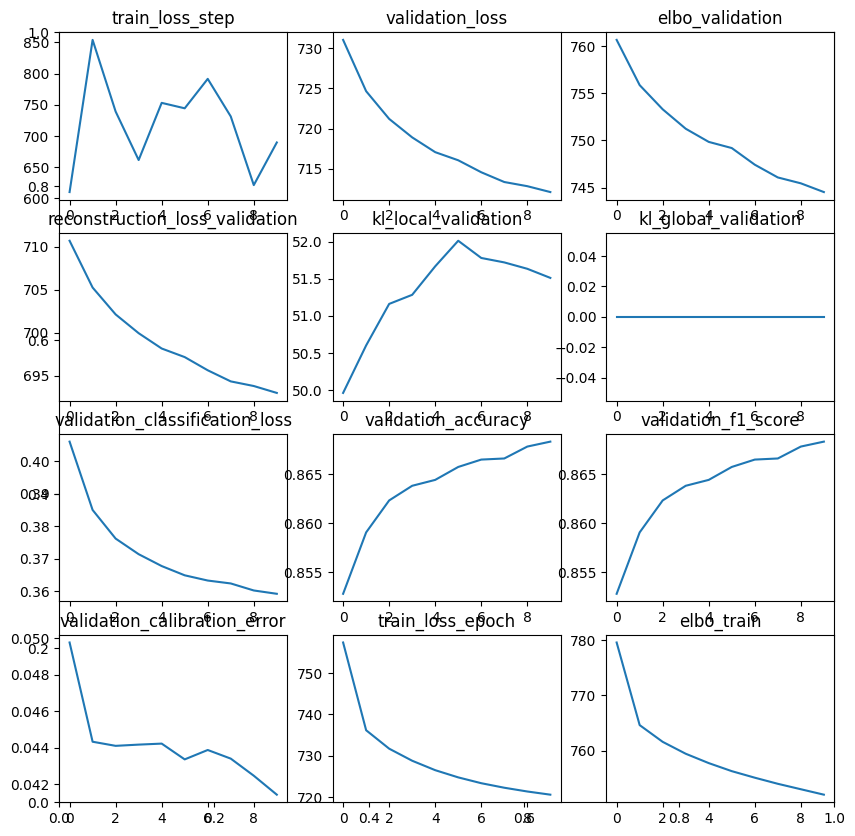

In [26]:
adata, model_test = run_scvi(adata, 
                     hvg_number=hvg_number, 
                              max_epochs=MAX_EPOCHS, 
                          batch_size_vae=BATCH_SIZE,
                                           N_LATENT=N_LATENTS,
                                          N_LAYERS=N_LAYERS )
print("trained. now load adata")

In [27]:
2 

2

In [28]:
1

1

In [29]:
0

0

In [30]:
# PATH="adata_scrna_eos.h5ad" 
# adata=sc.read_h5ad(PATH)
# adata.shape

In [31]:
try:
    predictions = model_test.predict(adata)
except:
    print("predictions didn't work")

In [32]:
ADATA_PATH

'adata_combined_new.h5ad.september.clustered.NEWNAMES'

In [33]:
adata=sc.read_h5ad(ADATA_PATH)
#¢adata = adata[adata.obs["combined_anno"]!="Nonspecific"]

print(adata.shape)
try:
    adata.obs["scanvi_predictions2"]=predictions
except:
    print("fail")


(3811042, 4993)


In [34]:
0

0

In [35]:
# # Get value counts
# counts = adata.obs["lvl5_annotation2"].value_counts()

# # Filter to values with >=5 counts
# valid_values = counts[counts >= 10].index

# # Keep only rows with valid annotations
# adata = adata[adata.obs["lvl5_annotation2"].isin(valid_values)].copy()
# adata.obs["lvl5_annotation2"].value_counts()

In [36]:
latent = model_test.get_latent_representation() 


In [37]:
adata.obsm["X_scvi"] = latent


In [38]:
adata.write(ADATA_PATH)
print("saved")

saved


In [ ]:
neighbor

In [40]:
neighbor_id = f"neighbor_{neighbor}"   
print("start neighbours")
sc.pp.neighbors(adata, use_rep = 'X_scvi', metric = "euclidean", n_neighbors=neighbor,key_added=neighbor_id)
print("neighbours done")

start neighbours
neighbours done


In [ ]:

mindist=0.1
print("start umap")
sc.tl.umap(adata, min_dist=mindist, neighbors_key = neighbor_id ) 

start umap


In [ ]:
sc.pl.umap(
    adata,
    color='tech',
    show=True,
    frameon=False,
    #legend_loc= "on data",
    legend_fontsize=5,
    s=1,
    title='',
    legend_fontoutline=2,
   # save="supplementary_integration.pdf"
)


In [ ]:
adata

In [ ]:
ADATA_PATH

In [ ]:
sc.pl.umap(
    adata,
    color='scanvi_predictions2',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=5,
    s=1,
    title='',
    legend_fontoutline=2,
   # save="supplementary_integration.pdf"
)


In [ ]:
sc.pl.umap(
    adata,
    color='leiden_res0.1',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=5,
    s=1,
    title='',
    legend_fontoutline=2,
   # save="supplementary_integration.pdf"
)


In [ ]:
sc.pl.umap(
    adata,
    color='leiden_res0.1',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=5,
    s=1,
    title='',
    legend_fontoutline=2,
   # save="supplementary_integration.pdf"
)


In [ ]:
sc.pl.umap(
    adata,
    color='lvl4_annotation',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=5,
    s=1,
    title='',
    legend_fontoutline=2,
   # save="supplementary_integration.pdf"
)


In [ ]:
1

In [ ]:
21

In [ ]:
stop

In [ ]:
print("done")
sc.tl.leiden(adata, #restrict_to=(CATEGORY,subset_cluster), 
             resolution=.1, random_state=1, 
             key_added=f'leiden_res0.1',
             neighbors_key= f"neighbor_{neighbor}"  )

#adata.write(PATH + ".1000genes2")
#adata.write("adata_scrna_and_xenium.h5ad.forhvg.integrated2.clustered2")
adata.write(ADATA_PATH)

In [ ]:
9

In [ ]:
adata.obs["fig8_mapping"].value_counts()

fig8_mapping
original    1480161
sept25       295240
Name: count, dtype: int64

In [ ]:
# adata_i=adata[adata.obs["fig8_mapping"]=="sept25"]
# import squidpy as sq
# for x in adata_i.obs["info_id6"].unique():
#     adata_ii=adata_i[adata_i.obs["info_id6"]==x]
#     sq.pl.spatial_scatter(
#         adata_ii,#[adata_i.obs["Timepoint"].str.startswith("Les")],
#         library_id="spatial",
#         shape=None,
#         color="scanvi_predictions",
#         size=25,
#         vmax=1,
#         #title=str(STATUS) + "_" + DONOR_ID,
#         #title=INFO_ID, #+ "_nonlesional",
#     # legend_loc=None,
#         # legend_loc="on data",
#                 edgecolor="black",
#         linewidth=0.1,
#                 legend_fontsize=12,
#        # save="fig2_day14_by_niche_legend.pdf"
    
#         #ax=ax,
#         #legend_loc="on data"  # Disable the legend for each subplot
#     )
#     #     if i>1:
#     #         break



In [ ]:
0

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
sc.pl.umap(
    adata,
    color='age',
    show=True,
    frameon=False,
    #legend_loc= "on data",
    legend_fontsize=5,
    s=1,
    title='',
    legend_fontoutline=2,
   # save="supplementary_integration.pdf"
)


In [ ]:
# PATH
# adata.write(PATH + ".2000genes")

In [ ]:
sc.pl.umap(
    adata,
    color='batch',
    show=True,
    frameon=False,
    #legend_loc= "on data",
    legend_fontsize=5,
    s=1,
    title='',
    legend_fontoutline=2,
   # save="supplementary_integration.pdf"
)
sc.pl.umap(
    adata2,
    color='batch',
    show=True,
    frameon=False,
    #legend_loc= "on data",
    legend_fontsize=5,
    s=1,
    title='',
    legend_fontoutline=2,
   # save="supplementary_integration.pdf"
)


In [ ]:
print("done")
sc.tl.leiden(adata, #restrict_to=(CATEGORY,subset_cluster), 
             resolution=.3, random_state=1, 
             key_added=f'leiden_res0.3',
             neighbors_key= f"neighbor_{neighbor}"  )
PATH
#adata.write(PATH + ".1000genes2")
#adata.write("adata_scrna_and_xenium.h5ad.forhvg.integrated2.clustered2")


In [ ]:
print("done")
sc.tl.leiden(adata, #restrict_to=(CATEGORY,subset_cluster), 
             resolution=2, random_state=1, 
             key_added=f'leiden_res2',
             neighbors_key= f"neighbor_{neighbor}"  )
PATH
#adata.write(PATH + ".2000genes")
#adata.write("adata_scrna_and_xenium.h5ad.forhvg.integrated2.clustered2")


In [ ]:
adata

In [ ]:
sc.pl.umap(
    adata,
    color='lvl5_annotation2',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=4,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)
sc.pl.umap(
    adata[adata.obs["tech"]=="xenium"],
    color='lvl5_annotation2',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=4,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:

sc.pl.umap(
    adata[adata.obs["tech"]=="xenium"],
    color='scanvi_predictions',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=4,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
# adata.write('adata_scrna_and_xenium.h5ad.forhvg.integrated2')

In [ ]:
# adata2=sc.read_h5ad('adata_scrna_and_xenium.h5ad.forhvg.integrated')

In [ ]:
try:
    sc.pl.umap(
    adata[adata.obs["tech"]=="xenium"],
    color=['provisional', "lvl5_annotation_new2"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)
except:
    1


In [ ]:
#adata_i=
sc.pl.umap(
    adata[adata.obs["lvl5_annotation_new"]=="ILC1"],
    color='tech',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
adata.obs["scanvi_predictions"] = predictions


In [ ]:
adata_i=adata[adata.obs["tech"]=="xenium"]

In [ ]:
neighbor_id = f"neighbor_{neighbor}"   
print("start neighbours")
sc.pp.neighbors(adata_i, use_rep = 'X_scvi', metric = "euclidean", n_neighbors=neighbor,key_added=neighbor_id)
print("neighbours done")
mindist=0.1
print("start umap")
sc.tl.umap(adata_i, min_dist=mindist, neighbors_key =neighbor_id ) 


In [ ]:
adata

In [ ]:
# # sc.tl.leiden(adata, #restrict_to=(CATEGORY,subset_cluster), 
# #              resolution=0.1, random_state=1, 
# #              key_added=f'leiden_res0.1',
# #              neighbors_key= f"neighbor_{neighbor}"  )
# adata.write("adata_scrna_and_xenium.h5ad.forhvg.integrated2.clustered")


In [ ]:
print("done")
sc.tl.leiden(adata, #restrict_to=(CATEGORY,subset_cluster), 
             resolution=0.3, random_state=1, 
             key_added=f'leiden_res0.3',
             neighbors_key= f"neighbor_{neighbor}"  )
PATH
#adata.write(PATH + ".2000genes")
#adata.write("adata_scrna_and_xenium.h5ad.forhvg.integrated2.clustered2")


In [ ]:
0

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(20,20))

sc.pl.umap(
    adata2,
    color=[ 'leiden_res0.3',"new_labels2"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)

In [ ]:
RENAME = {'0': 'Early',
 '1': 'Early',
 '10': 'Early',
 '11': 'Muscle',
 '12': 'Bone_meninges',
 '13': 'Muscle',
 '14': 'Misc',
 '15': 'Muscle',
 '16': 'Misc',
 '17': 'Early',
 '18': 'Heart',
 '19': 'Mesothelium',
 '2': 'Limb',
 '20': 'Misc',
 '21': 'Skin',
 '22': 'Muscle',
 '23': 'Misc',
 '3': 'Limb',
 '4': 'Mesothelium',
 '5': 'Skin',
 '6': 'Muscle',
 '7': 'Muscle',
 '8': 'Bone_meninges',
 '9': 'Bone_meninges'}


In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(25,25))

sc.pl.umap(
    adata,
    color=[ 'leiden_res0.1', "lvl4_annotation"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=18,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)

In [ ]:
# adata_i=adata[adata.obs["leiden_res0.1"]=="8"]
# adata_i

In [ ]:
# adata_i.write("adata_eos.h5ad")

In [ ]:
RENAME = {'0': 'Fibroblast',
 '1': 'KCdiff',
 '10': 'Schwann',
 '11': 'Melanocyte',
 '2': 'KCundiff',
 '3': 'T_ILC',
 '4': 'VE_Peri',
 '5': 'Mac',
 '6': 'Muscle_pericyte',
 '7': 'Sebocyte',
 '8': 'Sweat_gland',
 '9': 'Mast_cell'}

In [ ]:
adata.obs["coarse"]=adata.obs[f'leiden_res0.1'].map(RENAME)

In [ ]:
{x:x for x in sorted(adata.obs[f'leiden_res0.1'].unique())}

In [ ]:
adata.write(ADATA_PATH)

In [ ]:
0

In [ ]:
sc.pl.umap(
    adata,
    color=['coarse', "lvl4_annotation"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)

In [ ]:
sc.pl.umap(
    adata_i,
    color=['leiden_res0.1', 'leiden_res0.3'],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(20,20))

sc.pl.umap(
    adata_i,
    color=['scanvi_predictions',  ],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=5,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(20,20))

sc.pl.umap(
    adata_i,
    color=['PDGFRB', 'PDGFRA', "FRZB"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=3,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)

In [ ]:
sc.tl.leiden(adata, #restrict_to=(CATEGORY,subset_cluster), 
             resolution=0.1, random_state=1, 
             key_added=f'leiden_res0.1',
             neighbors_key= f"neighbor_{neighbor}"  )
try:
    del(adata.uns['leiden_res0.1_colors'])
except:
    1
sc.pl.umap(
    adata,
    color=[f'leiden_res0.1'],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)
#adata.write(ADATA_PATH)


In [ ]:
2

In [ ]:
sc.pl.umap(
    adata,
    color=[f'leiden_res0.1',"lvl5_annotation_new2"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=5,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
KEEP =['2', '7',' 4', '6', '9', '1']
adata = adata[adata.obs["leiden_res0.1"].isin(KEEP)]

In [ ]:
RENAME = {'0': 'MigDC (cDC2)',
 '1':  'cDC2: EREG+CCR7+',
 '10': 'TransitionalDC',
 '11': 'MigDC (cDC2) ??',
            '12': 'cDC1',
           '13': 'cDC1',
 '2':  'cDC1',
 '3': 'cDC1',
 '4':  'MigDC (cDC2)',
 '5':  'pDC',
 '6':   'pDC',
 '7':  'MigDC (cDC1)', 
# '8':  ''
 '9':   'TransitionalDC',}
adata.obs["provisional"]=adata.obs["leiden_res0.1"].map(RENAME)

In [ ]:
adata[adata.obs['leiden_res0.1']=="7"].obs.tech.value_counts()

In [ ]:
adata_ilc2 = adata[adata.obs['leiden_res0.1']=="7"]
adata_ilc2[adata_ilc2.obs["tech"]=="xenium"].obs.scanvi_predictions.value_counts()

In [ ]:
adata_ilc2[adata_ilc2.obs["tech"]=="xenium"].obs.Patient_status.value_counts()

In [ ]:
{x:x for x in sorted(adata.obs["leiden_res0.1"].unique())}

In [ ]:
RENAME = {'0': 'TRM_IL13+',
 '1': 'ILC3',
 '10': 'ILC/NK + Prolif',
 '11': 'ILC1_NCR2+P2RX7+',
 '2':  'TRM_IL13+',
 '3': 'ILC1',
 '4': 'NK',
 '5':  'TRM_IL13+',
 '6': 'ILC2',
 '7': 'TRM_IL17+2',
 '8': 'ILC3_CCL1+PTGDS+',
 '9':  'TRM_IL17+1',}
adata.obs["provisional"]=adata.obs["leiden_res0.1"].map(RENAME)

In [ ]:
try:
    del(adata.uns["provisional_colors"])
except:
    1
sc.pl.umap(
    adata,
    color=[ "provisional"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
# sc.tl.leiden(adata, restrict_to=("leiden_res0.1",['11',]), 
#              resolution=0.1, random_state=1, 
#              key_added=f'provisional2',
#              neighbors_key= f"neighbor_{neighbor}"  )
# try:
#     del(adata.uns['provisional2_colors'])
# except:
#     1
# sc.pl.umap(
#     adata,
#     color=["provisional2", "tech"],
#     show=True,
#     frameon=False,
#     legend_loc= "on data",
#     legend_fontsize=15,
#     s=50,
#     title='',
#     legend_fontoutline=2,
#   #  save="supplementary_integration.pdf"
# )


In [ ]:
# adata_ilc2 = adata[adata.obs['provisional2']=="11,1"]
# adata_ilc2[adata_ilc2.obs["tech"]=="xenium"].obs.scanvi_predictions.value_counts()

In [ ]:
adata_i = adata[adata.obs["tech"]=="xenium"]
adata_i.obs.lvl5_annotation_new.value_counts()

In [ ]:
adata_i[adata_i.obs['leiden_res0.1']=="7"].obs.Patient_status.value_counts()

In [ ]:
adata_i[adata_i.obs['leiden_res0.1']=="1"].obs.Patient_status.value_counts()

In [ ]:
adata_i.obs["Patient_status"].value_counts()

In [ ]:
sc.tl.leiden(adata, restrict_to=("provisional",['ILC/NK + Prolif',]), 
             resolution=0.1, random_state=1, 
             key_added=f'provisional2',
             neighbors_key= f"neighbor_{neighbor}"  )
try:
    del(adata.uns['provisional2_colors'])
except:
    1
sc.pl.umap(
    adata,
    color=["provisional2", "tech"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
# sc.tl.leiden(adata, restrict_to=("test",['2']), 
#              resolution=0.2, random_state=1, 
#              key_added=f'test2',
#              neighbors_key= f"neighbor_{neighbor}"  )
# try:
#     del(adata.uns['leiden_res0.1_colors'])
# except:
#     1
# sc.pl.umap(
#     adata,
#     color=[f'test2',"lvl5_annotation",],
#     show=True,
#     frameon=False,
#     legend_loc= "on data",
#     legend_fontsize=15,
#     s=50,
#     title='',
#     legend_fontoutline=2,
#   #  save="supplementary_integration.pdf"
# )


In [ ]:
# sc.tl.leiden(adata, restrict_to=("test2",['0,1']), 
#              resolution=0.1, random_state=1, 
#              key_added=f'test3',
#              neighbors_key= f"neighbor_{neighbor}"  )
# try:
#     del(adata.uns['leiden_res0.1_colors'])
# except:
#     1
# sc.pl.umap(
#     adata,
#     color=[f'test3',"lvl5_annotation_new",],
#     show=True,
#     frameon=False,
#     legend_loc= "on data",
#     legend_fontsize=15,
#     s=50,
#     title='',
#     legend_fontoutline=2,
#   #  save="supplementary_integration.pdf"
# )


In [ ]:
# sc.tl.leiden(adata, restrict_to=("test3",['2,1']), 
#              resolution=0.1, random_state=1, 
#              key_added=f'test4',
#              neighbors_key= f"neighbor_{neighbor}"  )
# try:
#     del(adata.uns['leiden_res0.1_colors'])
# except:
#     1
# sc.pl.umap(
#     adata,
#     color=[f'test4',"lvl5_annotation_new",],
#     show=True,
#     frameon=False,
#     legend_loc= "on data",
#     legend_fontsize=15,
#     s=50,
#     title='',
#     legend_fontoutline=2,
#   #  save="supplementary_integration.pdf"
# )


In [ ]:
sc.pl.umap(
    adata,
    color=['CCR7',"TCF7"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
    vmax="p99"
  #  save="supplementary_integration.pdf"
)


In [ ]:
ALL_T = {'Conventional': ['CD3D', "CD4", "CD8A"],
 'Treg': ['FOXP3', 'TIGIT', 'CTLA4', 'IL2RA'],
 'Activated_Treg': ['LRRC32',
  'IL1R1',
  'IL1R2',
  'CCR8',
 # 'CMSS1',
  'LRRC32',
  'LAYN',
  'CCR8',
  'NR4A1'],
 'TR1': ['EOMES',
  'IL10',
  'LAG3',
  'HAVCR2',
  'PDCD1',
  'FOXB1',
  'TNFSF9',
  'VCAM1'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ICAM2', 'PASK', ],
 'GIMAPs': ['GIMAP1', 'GIMAP4', 'GIMAP5', 'GIMAP7'],
 'Th': ['CD4', 'CD40LG', 'MCAM', ],
         "CCR6+": ['CCR6', 'BACH2', "CXCR6"],
 'Th_PPARGhi': ['PPARG', 'BTD', 'KIF13B', 'DGKH', 'RORA-AS1','SPAG1'],
 'Th6': ['BACH2', 'XYLT1', 'GNAQ', 'PPARG',  'ZEB2', # 'PTGS2', 'MMP7',
        "ZHX2"],
         "CD8": ["CD8A"],
          'TC_IL9R': ['GPR15', 'CD8B2', 'IL9R', 'DONSON'],

 'CD8A+ cytotoxic T cells': ["KLRG1", 'GZMK', 'CCL4', 'IFNG', 'TNFSF9', 'CCL3'],
         
 'Cytotoxic': ['NKG7', 'CCL5', 'GZMA'],
 'Tissue-residency\n markers': ['CD8A', 'ITGAE', 'CD109', 'ZNF683', 'ENTPD1'],
 'T_2': ['IL22', 'IL13', 'NBAS',# 'CCL17',
         'AREG', 'IL9R', 'PDLIM4', 'CCR8'],
 'TRM_IL13': ['ZBTB16', 'KLRC4', 'ADGRG1', 'RGS9'],
 'T_17': ['IL17A',
  'IL17F',
  'CXCL13',
  'CCL20',
  'IL23R',
  'RORC',
  'ADAM12',
  'LRRN3',
  'MYO7A',
  'IL21',
  'CTSH',
  'VDR',
  'CCR6',
  'IL26'],
 'Other': ['PTPN13', #'ITGA1'
          ],
 'ITGA1hi': ['ITGA1', 'ZHX2', 'BICD1', 'PRR5L', 'ST8SIA1', 'ZNF407', "KLRG1"],
 'Memory': ['CD69'],
 'Gamma-delta': ['FXYD2',
  'TRGC2',
  'TRDV1',
  'TRGV4',
  'EMP1',
  'NSG1',
  'MPZL2',
  'KLRC2',
  'XCL1',
  'KLRC2',
  'KLRC3',
  'KLRD1',
  'TRDC',
  'VSTM2L',
  'LAT2',
  'SPINT2',
  'KRT86',
  'FCER1G',
  'TRDV1',
  'SPRY2'],
 'Innate': [#'KLRC2', 'KLRC3', 'KLRB1', 'KIT', 'KLRC1',
     'TYROBP', 'FCER1G'],
 'ILC2': ['GATA3', 'PTGDR2', 'TNFRSF25'],
 # 'ILC2_inflammatory': ['CRLF2',
 #  'IL17RB',
 #  'IL1RL1',
 #  'IL18R1',
 #  'PLA2G4A',
 #  'IL4',
 #  'IL31',
 #  'ICOS',
 #  'NRROS'],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A']
        }
 

# sc.pl.dotplot(adata_i, 
#               ALL_T,
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var")


# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(ALL_T),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,)



# adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()
# adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST

CATEGORY="provisional2"
sc.pl.dotplot(
    adata[adata.obs["tech"]!="xenium"],
    remove_markers(ALL_T),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata[adata.obs["tech"]=="xenium"],
    remove_markers(ALL_T),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    dot_max=0.3
) 
# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(kc_markers),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.8,)


In [ ]:
mac_markers={ 'Monocyte': ['CD14', 'VCAN', 'S100A8', 'S100A9', 
              'S100A12', "FCN1",'MEFV'], #"FCGR3A"
 #'Monocyte1': ['SERPINB2', 'MTF1', 'PTGER2'],
 #'Monocyte2': ['aaFCGR1A', 'SYT1', 'ASGR1', 'PRAM1', 'CCR2'],
# 'Mono_KC': ['KRT16', 'EGFR'],
 'Macrophage': ['C1QA', 'C1QC',  'CD163', 'CCL4', "STAB1",'MARCO', ],
      'Macro1': ['SLAMF9', 'TNFRSF6B',#"CXCL5", #"IL24"
                # "CCL24"
                ],

 'Macro2': ['MRC1','F13A1', "LYVE1","IGF1", "CCL13", 'CCL14', "CD209"],
 #'T': ['CD3E', 'CD96', 'TRBC1'],
 #'Macro_NEU4/LRRC32': ['CCL4L2', 'CCRL2', 'ACHE', 'NEU4', 'IL23A', 'CD40'],
# 'TREM2+ADAMDEC1+': ['TREM2', 'CXCL5', 'EPHB2', 'STAC', 'FAM20C'],
 'CX3CR1+MAC': ['TREM2', 'SPP1',  "LPL", 'CX3CR1', #'ADRB1', 
              # "KCNQ3"#"UNC5B", "GPR34", "SMAD7",  "CD72", "TGFBR1", 
             #  "CD9",
               
                "P2RY12", #'ADAMDEC1',
                'FCGR3A', 
                'TGFBR1', 'PRKCH', 'CD93', 'HTRA1', "ADRB1",
               ],
             'AXL+SIGLEC6+': ['AXL', 'SIGLEC6', 'NUMBL', 'IFI27', 'CXCR3', 'PLXNA4', 'KDR', "SELL",
                             "TNFSF4", "TCF4"],

 'cDC1': ['CLEC9A', 'XCR1', "ENPP1", "PPY", "BTLA", "TLR3"],
             "Mature cDC1": ["ITGAE", "CD8A"],
 'cDC2': ['CLEC10A', 'CD1B', 'CD1C', "CD163", 'CD1E', # 'CD5', 
          #'SPIB', 'TNFSF4', 'TSPAN2'
         ],

             'cDC2B_subtype_MMP12': ['MMP12', "CST6", "GGT5", "CARD9",  "ALOX15", "CXCL9",#'CROCC',
                   ],
              'cDC2B_subtype_EREG+': ["EREG",'IL1B', #'CROCC',
                                       "SATB1",
                                      "EHD1", "LUCAT1", "ITGAV", "OLR1", "TNFRSF4", "DOT1L", "DOCK4",
              "ADA", "MMP19", "ELK1", "LAMB3", "MIR3142HG", "GPR35",   "ISG20", "CXCL3", "MMP9",  
                   ],
              'Migrating': ['CCR7', 'LAMP3',  ], 
             # 'MoDC': ["PLK2", "KLF2", "THBS1"
             #     #'THBS1',  'C1QTNF1', "INHBA", "TNFRSF4"
             # ],

 'LC': ['CD207','FCGBP', "EPCAM", 'CD1A', "SLC18A2", "TMEM45A", "IL22RA2","NMU" #"CLEC4A"
       ],

 'MigDC': ['LY75', "CD200",  "BATF3",'SLCO5A1', 'WNT5B', 'ADAM12', "ACHE",
           "CD274", "PDCD1LG2",  "TNFSF4", "PVR", "RAMP1" , "EBI3","ICOSLG",
          "TREML1", "CD80", ],  #'ST8SIA1', 'CCL19', "CCL17", "CCL22",
         
     #"TFPI", "SERINC2", #"IL10",
          #'LILRA1', 'LILRA2'
             "MigDC(cDC2)": ["ANXA3"],
             "T_survival/attracting": ["IL12B", "IL15",  "CCL22", "CCL17", ],
 'pDC': ['CLEC4C',  #'IL3RA', 'TNFRSF21', 
         
         'LILRA4', 'PTCRA', 'IGKJ5', 'LAMP5', "P2RY6",# "ITGAE", 
         "PTGDS"],
"pDC_extra": ['LAMP5', 'TLR9',  'SMIM5', 'IGKJ5', 'EPDR1',],
 'Neutrophil': [#'CXCL8',
     'FCGR3B', "CXCR2", "PROK2", "OSM",  #KCNJ15, ADGRG3
                # "MPO"
               ], 
                      #(adata.obs[CATEGORY]== "Neutrophil")]
              "Mast cell": [#"HPGDS", "KIT", "HPGD",
                    "HDC", #"GATA2",   
                    "TPSAB1", "TPSB2", "MS4A2","MRGPRX2",
                              "CALB2", "ALDH1A1" #"CAVIN2", "HEY1"
                ],
            "Eosinophils": [ "CLC", "CCR3",#"CCL23",    #"PTGDR2", "P2RY1", 
                            "S100P",],
            #"OTHER": ["SECISBP2L"],
             "cycling": ["TOP2A", "MKI67"]
            }

# adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()
# adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()
# adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST
CATEGORY="provisional"
sc.pl.dotplot(
    adata[adata.obs["tech"]!="xenium"],
    remove_markers(mac_markers),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata[adata.obs["tech"]=="xenium"],
    remove_markers(mac_markers),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    dot_max=0.3
) 

In [ ]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG", 'SLA2', 'KIR2DL4', 'SH2D1B', 'SLFN13', 'TMIGD2'],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", 'GZMK', 'OASL', 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  [ 'NCR1', 'NCAM1',  'P2RX7',   'ZNF407', "IL18",'ZBTB20', 'CASK', "ITGA1"],
 'ILC1/3': ['XCL1', 'XCL2', ],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",]
        }

#CATEGORY            ="leiden_res0.1"
#CATEGORY="provisional"
sc.pl.dotplot(
    adata[adata.obs["tech"]!="xenium"],
    remove_markers(ALLT2),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata[adata.obs["tech"]=="xenium"],
    remove_markers(ALLT2),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    dot_max=0.3
) 
# sc.pl.dotpl



In [ ]:
RENAME = {'ILC1': 'ILC1',
 'ILC3': 'ILC3',
 'TRM_IL13+': 'TRM_IL13+',
 'TRM_IL17+2': 'TRM_IL17+',
 'NK': 'NK',
 'ILC2': 'ILC2',
 'ILC/NK + Prolif,0': 'ILC_Prolif',
 'ILC1_NCR2+P2RX7+': 'ILC1_NCR2+P2RX7+',
 'ILC3_CCL1+PTGDS+': 'ILC3_CCL1+PTGDS+',
 'TRM_IL17+1': 'TRM_IL17+',
 'ILC/NK + Prolif,1': 'ILC/NK'}
adata.obs["celltypes"]=adata.obs["provisional2"].map(RENAME)

In [ ]:
{x:x for x in adata.obs["provisional2"].unique()}

In [ ]:
0

In [ ]:
sc.pl.umap(
    adata[adata.obs["tech"]=="xenium"],
    color=[f'leiden_res0.1',"lvl5_annotation_new"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)
sc.pl.umap(
    adata,
    color=[f'leiden_res0.1',"lvl5_annotation_new"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
mac_markers={ 'Monocyte': ['CD14', 'VCAN', 'S100A8', 'S100A9', 
              'S100A12', "FCN1",'MEFV'], #"FCGR3A"
 #'Monocyte1': ['SERPINB2', 'MTF1', 'PTGER2'],
 #'Monocyte2': ['aaFCGR1A', 'SYT1', 'ASGR1', 'PRAM1', 'CCR2'],
# 'Mono_KC': ['KRT16', 'EGFR'],
 'Macrophage': ['C1QA', 'C1QC',  'CD163', 'CCL4', "STAB1",'MARCO', ],
      'Macro1': ['SLAMF9', 'TNFRSF6B',#"CXCL5", #"IL24"
                # "CCL24"
                ],

 'Macro2': ['MRC1','F13A1', "LYVE1","IGF1", "CCL13", 'CCL14', "CD209"],
 #'T': ['CD3E', 'CD96', 'TRBC1'],
 #'Macro_NEU4/LRRC32': ['CCL4L2', 'CCRL2', 'ACHE', 'NEU4', 'IL23A', 'CD40'],
# 'TREM2+ADAMDEC1+': ['TREM2', 'CXCL5', 'EPHB2', 'STAC', 'FAM20C'],
 'CX3CR1+MAC': ['TREM2', 'SPP1',  "LPL", 'CX3CR1', #'ADRB1', 
              # "KCNQ3"#"UNC5B", "GPR34", "SMAD7",  "CD72", "TGFBR1", 
             #  "CD9",
               
                "P2RY12", #'ADAMDEC1',
                'FCGR3A', 
                'TGFBR1', 'PRKCH', 'CD93', 'HTRA1', "ADRB1",
               ],
             'AXL+SIGLEC6+': ['AXL', 'SIGLEC6', 'NUMBL', 'IFI27', 'CXCR3', 'PLXNA4', 'KDR', "SELL",
                             "TNFSF4", "TCF4"],

 'cDC1': ['CLEC9A', 'XCR1', "ENPP1", "PPY", "BTLA", "TLR3"],
             "Mature cDC1": ["ITGAE", "CD8A"],
 'cDC2': ['CLEC10A', 'CD1B', 'CD1C', "CD163", 'CD1E', # 'CD5', 
          #'SPIB', 'TNFSF4', 'TSPAN2'
         ],
 'cDC2B_subtype_IL1B': ['IL1B',"EREG", #'CROCC',
                   ],
             'cDC2B_subtype_MMP12': ['MMP12', "CST6", "GGT5", "CARD9",  "ALOX15", "CXCL9",#'CROCC',
                   ],
              'Migrating': ['CCR7', 'LAMP3',  ], 
             # 'MoDC': ["PLK2", "KLF2", "THBS1"
             #     #'THBS1',  'C1QTNF1', "INHBA", "TNFRSF4"
             # ],

 'LC': ['CD207','FCGBP', "EPCAM", 'CD1A', "SLC18A2", "TMEM45A", "IL22RA2","NMU" #"CLEC4A"
       ],

 'MigDC': ['LY75', "CD200",  "BATF3",'SLCO5A1', 'WNT5B', 'ADAM12', "ACHE",
           "CD274", "PDCD1LG2",  "TNFSF4", "PVR", "RAMP1" , "EBI3","ICOSLG",
          "TREML1", "CD80", ],  #'ST8SIA1', 'CCL19', "CCL17", "CCL22",
         
     #"TFPI", "SERINC2", #"IL10",
          #'LILRA1', 'LILRA2'
             "MigDC(cDC2)": ["ANXA3"],
             "T_survival/attracting": ["IL12B", "IL15",  "CCL22", "CCL17", ],
 'pDC': ['CLEC4C',  #'IL3RA', 'TNFRSF21', 
         
         'LILRA4', 'PTCRA', 'IGKJ5', 'LAMP5', "P2RY6",# "ITGAE", 
         "PTGDS"],
"pDC_extra": ['LAMP5', 'TLR9',  'SMIM5', 'IGKJ5', 'EPDR1','CXCR2','PROK2', 'FCGR3B' ],
 'Neutrophil': [#'CXCL8',
     'FCGR3B', "CXCR2", "PROK2", "OSM",  #KCNJ15, ADGRG3
                # "MPO"
               ], 
                      #(adata.obs[CATEGORY]== "Neutrophil")]
              "Mast cell": [#"HPGDS", "KIT", "HPGD",
                    "HDC", #"GATA2",   
                    "TPSAB1", "TPSB2", "MS4A2","MRGPRX2",
                              "CALB2", "ALDH1A1" #"CAVIN2", "HEY1"
                ],
            "Eosinophils": [ "CLC", "CCR3",#"CCL23",    #"PTGDR2", "P2RY1", 
                            "S100P",],
            #"OTHER": ["SECISBP2L"],
             "cycling": ["TOP2A", "MKI67"]
            }
#CATEGORY="test3"
sc.pl.dotplot(
    adata[adata.obs["tech"]!="xenium"],
    remove_markers(mac_markers),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata[adata.obs["tech"]=="xenium"],
    remove_markers(mac_markers),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    dot_max=0.3
) 

In [ ]:
0

In [ ]:
stop

In [ ]:
# RENAME = {'0,1,0': 'Tnaive2',
#  '2,2': 'Th_PPARGhi',
#  '0,0': 'T',
#  '1': 'Th',
#  '0,1,1': 'Tnaive1',
#  '0,2': 'T',
#  '2,0': 'Th_PPARGhi',
#  '2,1,1': 'Th_PPARGhi',
#  '2,1,0': 'Th_PPARGhi',
#  '3': 'T_Prolif',
#  '2,1,2':'Th_PPARGhi_IL17+',}
# adata.obs["celltypes"]=adata.obs["test4"].map(RENAME)

In [ ]:
adata[adata.obs["leiden_res0.1"]=="1"].obs.tech.value_counts()

In [ ]:
STOP

In [ ]:
adata_i=adata_i[adata_i.obs["lvl5_annotation"]!="KC_HF: ORS_cycling"]

In [ ]:
sc.tl.leiden(adata_i, #restrict_to=(CATEGORY,subset_cluster), 
             resolution=0.2, random_state=1, 
             key_added=f'leiden_res0.1',
             neighbors_key= f"neighbor_{neighbor}"  )
try:
    del(adata_i.uns['leiden_res0.1_colors'])
except:
    1
sc.pl.umap(
    adata_i,
    color=[f'leiden_res0.1',"lvl5_annotation", "tech"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=25,
    s=150,
  #  title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
sc.pl.umap(
    adata,
    color=['MKI67'],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=25,
    s=50,vmax='p99',
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
# sc.tl.leiden(adata_i, #restrict_to=(CATEGORY,subset_cluster), 
#              resolution=0.3, random_state=1, 
#              key_added=f'leiden_res0.1',
#              neighbors_key= f"neighbor_{neighbor}"  )
# try:
#     del(adata_i.uns['leiden_res0.1_colors'])
# except:
#     1
# sc.pl.umap(
#     adata_i,
#     color=[f'leiden_res0.1',"lvl5_annotation"],
#     show=True,
#     frameon=False,
#     legend_loc= "on data",
#     legend_fontsize=15,
#     s=50,
#     title='',
#     legend_fontoutline=2,
#   #  save="supplementary_integration.pdf"
# )


In [ ]:
# adata_i=adata[adata.obs["leiden_res1"]=="4"]

In [ ]:
adata

In [ ]:
RENAME = {"0": "MigDC (cDC2)",
          "1": "MigDC (cDC1)",
         
         }
adata.obs["celltypes"]=adata.obs["leiden_res0.1"].map(RENAME)#.fillna("Exclude")
          

In [ ]:
adata_i=adata[adata.obs["tech"]=="xenium"]
print(adata_i.obs.lvl5_annotation.value_counts())
sc.pl.umap(
    adata,
    color='lvl5_annotation',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=15,
    s=5,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
# sc.tl.leiden(adata, #restrict_to=(f'leiden_res0.1',['3']), 
#              resolution=0.3, random_state=1, 
#              key_added="test",
#              neighbors_key= f"neighbor_{neighbor}"  )
# try:
#     del(adata.uns["test_colors"])
# except:
#     1
# sc.pl.umap(
#     adata,
#     color=f'test',
#     show=True,
#     frameon=False,
#     legend_loc= "on data",
#     legend_fontsize=5,
#     s=5,
#     title='',
#     legend_fontoutline=2,
#   #  save="supplementary_integration.pdf"
# )


In [ ]:
adata[adata.obs[f'leiden_res0.1']=="5"].obs.tech.value_counts()

In [ ]:
adata.obs.lvl5_annotation.value_counts()

In [ ]:
#CATEGORY = f'leiden_res{RESOLUTION}'
kc_markers={     "KC_HF": ["LHX2", "RARRES2",],

             'KC_HF: Basal': [ "CD200", 'NPNT','LGR5', 'GLI2', #"CNTN6", "GREM1", 'IL31RA'
                             ],
 'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
        # "KC6": ['SMPD3', 'CTSH',  "AQP9" ],

 'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH', "HOXC13", "LEF1", "DLX2",
                 "SHH",  'MSI1',
  'MYCN',

  #'SOX11',
                 ],
       "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
    "HS": ["TGM1", "KRT82", "KRT35", "KRT23"],

    # 'Sebocyte': [ "GATA6",    'MGST1', "AR","PTN", 
    #              "FST", "ANGPTL2",],


 'Sebocyte': [ "GATA6",    'MGST1', "AR",
                 #"FST", "ANGPTL2",  
                ],
 'Basal': ['COL17A1',    "TINAGL1",  "DLK2", # "CDH22" ,
           "PTN", "DLL1" ],

         'KC_Sebocyte_duct_outer': ["CCL19", "CCL27",#"CCL22",
                 #"VCAM1", "IRF1", "ITGB1", 
                                   ],
    
     'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", #"GATA6",
                                "SERPINB4", "LIPG", "CCDC61",  ],
             "Sebocyte_junction": ["CDSN", "BEAN1","KLK10", "ADGRB1", "TGM1", "SLC5A1", "OCLN", "CALB2",
                # "LGALSL",
                  "SMPD3",  "IL18","LIPG", "NFATC2", #"SERPINA3", 
                  "SH3BGRL2",
                 "MYO5B"],
# 'KC_Sebocyte_duct_outer_cycling': [''],
 #'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
            "PPARG+": [ 'PPARG',  "PPARA", 'GAL',  "FADS1", "FADS2", 'ALCAM',"PLIN4",
                      "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3", "CLSTN3", "EMB"
                       #"LRG1", "ACACB", "PC", 
                            # "MAOA", "PM20D1",
                      ],
     'KC_Sebocyte_PPARG+_basal': [    "TGFBR3", "FZD4", "HSD11B1" ,  "NNAT", "CD14", "FAM107A",  "NNAT",],
 'KC_Sebocyte_PPARG+_inner': [  "CUX2", 
                              "SEC14L3", 
                              "TNNT2",
                             "DMBX1",# "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
                             ],
#      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
#                         ],
            "Retinoic acid": ["PNPLA3", "ALDH1A1", "ALDH1A2"], 
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]
    "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
            'Channel': [ 'RUNX3', 'CCN3',# "MYLPF", #"FGF7"
                        ],
        
    "Channel_outer":  [#'COL17A1', 
        "PTGFR", "ITGB2", "TG", "ADRB2"],
            "Channel_inner": [ "CFTR",  #"CRHR1",
                              "GPR12", 'FGFBP2', 'MAL', ],
    
 'Sweat_gland': ["PPARGC1A",#'KRT7', 'KRT19',
                 'DCD', #"SLC12A2",
                 "PPP1R1B", "AQP5", "CHRM3", "ACHE"], 
    
                               
 'LGR6+': [#'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
           'MPPED2',#'KCNQ5',
         # 'LTBP2', #'IGFBP2', 
           'TGFB1I1',#'MCAM',
           'KCNMB1', 'SMOC2', 'JAM3',# "CD200",
     "FBLN2",],
            
    

 #"Gland": [ ],
    #"KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
   # "Merkel": ["ATOH1", "KRT20"],
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]

}
 

 
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST 
        
CATEGORY=f"leiden_res0.1"
#CATEGORY="celltypes"

# sc.pl.dotplot(adata_i, 
#               P_markers,
#               groupby=CATEGORY, 
#               dendrogram=False, 
#                 standard_scale="var")
sc.pl.dotplot(adata_i[adata_i.obs["tech"]=="xenium"], 
              remove_markers(kc_markers),
              groupby=CATEGORY,
              dendrogram=False, 
              vmax=1,
               # standard_scale="var", 
              dot_max=0.3,)
sc.pl.dotplot(adata_i[adata_i.obs["tech"]!="xenium"], 
              remove_markers(kc_markers),
              groupby=CATEGORY,
              dendrogram=False, 
              vmax=1,
               # standard_scale="var", 
             # dot_max=0.3,
             )


In [ ]:
sc.pl.dotplot(adata[adata.obs["tech"]!="xenium"], 
              remove_markers(ALL_T),
              groupby="celltypes",
              dendrogram=False, 
              vmax=1,
                standard_scale="var", 
             # dot_max=0.3,
             )

In [ ]:
sc.pl.dotplot(adata[adata.obs["tech"]=="xenium"], 
              remove_markers(ALL_T),
              groupby="celltypes",
              dendrogram=False, 
              vmax=1,
                standard_scale="var", 
              dot_max=0.3,
             )

In [ ]:
RENAME = {"0": "KC1",
          "1": "KC2",
          #"2": "KC_SebocyteDuct_Outer/HF_junction2"
         }
adata.obs["celltypes"]=adata.obs["leiden_res0.1"].map(RENAME)

In [ ]:
sc.pl.dotplot(adata, 
              remove_markers(kc_markers),
              groupby="celltypes",
              dendrogram=False, 
              vmax=1,
               # standard_scale="var", 
              dot_max=0.3,)

In [ ]:
neu_names=adata.obs["celltypes"].to_dict()

In [ ]:
import pickle

output_path = "tnaive.pkl"

with open(output_path, "wb") as f:
    pickle.dump(neu_names, f)

In [ ]:
0

In [ ]:
# sc.pl.umap(
#     adata_i,
#     color=f'test',
#     show=True,
#     frameon=False,
#     legend_loc= "on data",
#     legend_fontsize=5,
#     s=5,
#     title='',
#     legend_fontoutline=2,
#   #  save="supplementary_integration.pdf"
# )



In [ ]:

sc.pl.umap(
    adata_i,
    color=f'leiden_res0.1',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=25,
    s=150,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
adata[adata.obs["tech"]=="xenium"].obs.lvl5_annotation.value_counts()

In [ ]:
#                 standard_scale="var")
sc.pl.dotplot(adata_i, 
              remove_markers(P_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var", 
              dot_max=0.3,)
# except:

In [ ]:
adata_i.obs["celltypes"].value_counts()

In [ ]:
adata_i=adata_i[adata_i.obs["celltypes"]!="Exclude"]
adata_i.obs["celltypes"].value_counts()

In [ ]:
stop

In [ ]:

sc.pl.umap(
    adata,
    color=f'celltypes',
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=25,
    s=150,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
CATEGORY="celltypes"
sc.pl.dotplot(adata, 
              remove_markers(ALLT2),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var", 
            #  dot_max=0.3,
             )

In [ ]:
#                 standard_scale="var")
sc.pl.dotplot(adata[adata.obs["tech"]=="xenium"], 
              remove_markers(ALLT2),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var", 
              dot_max=0.3,
             )
# except:

In [ ]:
sc.pl.dotplot(adata_i, 
              remove_markers(mac_markers),
              groupby=CATEGORY,
              dendrogram=False, 
              vmax=1,
               # standard_scale="var", 
              dot_max=0.3,)

In [ ]:
neu_names = adata.obs["provisional"].to_dict()

In [ ]:
import pickle

output_path = "TDC_good_cdc1_GOOD.pkl"

with open(output_path, "wb") as f:
    pickle.dump(neu_names, f)

In [ ]:
adata

In [ ]:
adata_5k_ii=adata[adata.obs["tech"]=="xenium"]
CATEGORY="celltypes"
sc.tl.rank_genes_groups(adata_5k_ii, CATEGORY, method='wilcoxon', key_added="de_leiden");
df2 = pd.DataFrame(adata_5k_ii.uns['de_leiden']['names'])
df2.head(50)
for i,x in enumerate(df2.columns):
    print(i, " : ", x)


In [ ]:

# # # import pandas as pd
# #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]


select_population = list(df2.columns)[0
                                     ]
                                     
print(select_population)

genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]

# # Define the desired order for the CATEGORY
# category_order = ['Lesional Baseline', 'Day 3', 'Day 14', 'Week 12', 'Non-lesional Baseline']

# # Ensure the CATEGORY column in adata has the desired order
# adata_i.obs[CATEGORY] = pd.Categorical(adata_i.obs[CATEGORY], categories=category_order, ordered=True)

# # # Now, generate each dot plot with the specified order applied
# sc.pl.dotplot(
#     adata_5k_ii,
#     genes0,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )

# sc.pl.dotplot(
#     adata_5k_ii,
#     genes1,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )
sc.pl.dotplot(
    adata_5k_ii,
    genes0,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)

sc.pl.dotplot(
    adata_5k_ii,
    genes1,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)



In [ ]:
list(genes0)

In [ ]:
# sc.pl.umap(
#     adata,
#     color='CLC',
#     show=True,
#     frameon=False,
#     legend_loc= "on data",
#     legend_fontsize=5,
#     s=5,
#     title='',
#     vmax="p99",
#     legend_fontoutline=2,
#   #  save="supplementary_integration.pdf"
# )


In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(3,3))
sc.tl.paga(adata, groups="lvl5_annotation_new",   neighbors_key= f'neighbor_{neighbor}'
          )
    

sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(20,20))

sc.pl.paga(adata, plot=True, threshold=0.1) 

In [ ]:
sc.tl.umap(adata, init_pos='paga',   min_dist=0.1,
          neighbors_key = f'neighbor_{neighbor}'
          )
      
           #labels="test13") 
sc.pl.umap(
    adata,
    color=[ "lvl5_annotation_new", "tech"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=25,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
0

In [ ]:
stop1

In [ ]:
adata_i[adata_i.obs["test"]=="4"].obs.Patient_status.value_counts()

In [ ]:
# PATH='adata_scrna_T.h5ad.ILC_TRMonly'
# adata.write(PATH+".integrated")


In [ ]:
stop

In [ ]:
sc.pl.umap(
    adata_i,
    color=[ "celltypes"],
    show=True,
    frameon=False,
    legend_loc= "on data",
    legend_fontsize=25,
    s=50,
    title='',
    legend_fontoutline=2,
  #  save="supplementary_integration.pdf"
)


In [ ]:
1

In [ ]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(10, 10))


plt.rcParams['axes.grid'] = False
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# sc.settings.figdir = "fig5"
# scv.settings.figdir = "fig5"


In [ ]:
0